In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
# reflect the tables
Base=automap_base()
Base.prepare(engine, reflect=True)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [25]:
# Create our session (link) from Python to the DB
session=Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [26]:
#inspecting the tables
stations = engine.execute("select * from Station")
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [92]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [93]:
columns = inspector.get_columns("Station")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [94]:
measurements = engine.execute("select * from Measurement limit 10")
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [95]:
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [96]:
columns = inspector.get_columns("Measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [97]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=366)
print("Date one year from the last date in data set:",date_year_ago)


Date one year from the last date in data set: 2016-08-22


In [99]:
#retrieving the daily max precipitation score in the 12 months
Year_Prcp = session.query(Measurement.date,func.max(Measurement.prcp)).\
                    filter(func.strftime("%Y-%m-%d",Measurement.date) > date_year_ago).\
                    group_by(Measurement.date).all()
#Year_Prcp

In [100]:
# precipitation results as a Pandas DataFrame and the date column set as index

precipitation_df = pd.DataFrame(Year_Prcp, columns=["date","precipitation"])
precipitation_df.set_index("date",inplace = True)
precipitation_df

,precipitation
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [101]:
# precipitation dataframe sorted by date
Prcp_sorted_df = precipitation_df.sort_values("date")
Prcp_sorted_df


,precipitation
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


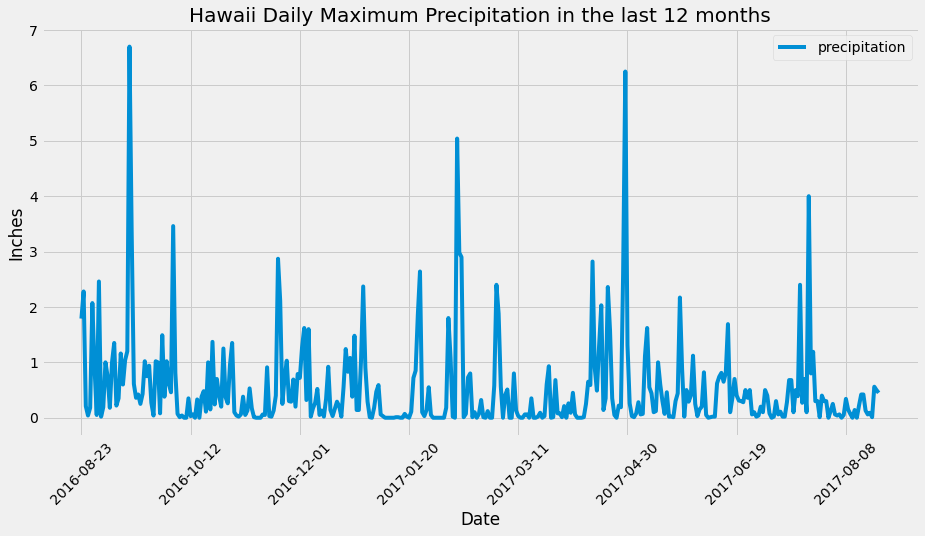

In [120]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.rcParams["figure.figsize"]=(14,7)
Prcp_sorted_df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Daily Maximum Precipitation in the last 12 months",fontsize=20)
plt.show()

In [104]:
# All precipitations score for the last year 
yearly_precip_stats = session.query(Measurement.date, Measurement.prcp).\
                              filter(Measurement.date>date_year_ago).all()
#yearly_precip_stats



In [105]:
yearly_precip_df = pd.DataFrame(yearly_precip_stats, columns=["date","precipitation"])
yearly_precip_df.set_index("date",inplace = True)
yearly_precip_df.dropna()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [106]:
# summary statistics for the precipitation data
yearly_precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [107]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f"there are {total_stations} stations in Hawaii.")


there are 9 stations in Hawaii.


In [108]:
# Design a query to find the most active stations (i.e. what stations have the most rows?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [109]:
# Using the most active station id from the previous query
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
                              order_by(func.count(Measurement.station).desc()).\
                              group_by(Measurement.station).first()
most_active_station

('USC00519281', 2772)

In [110]:


#calculate the lowest, highest, and average temperature records of the most active station.
records_active_station=[Measurement.station,
                        func.min(Measurement.tobs),
                        func.max(Measurement.tobs),
                        func.avg(Measurement.tobs)]

value_most_activeST= session.query(*records_active_station).\
                             filter(Measurement.station=="USC00519281").all()

#value_most_activeST
value_most_activeST_df=pd.DataFrame(value_most_activeST, columns=["station","Min.temperature",
                                                                  "Max.temperature","Avg.Temperature"])

value_most_activeST_df.set_index("station",inplace=True)
value_most_activeST_df


,Min.temperature,Max.temperature,Avg.Temperature
station,,,
USC00519281,54.0,85.0,71.663781


In [111]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

temp_obsv_mostact= session.query(Measurement.date,Measurement.tobs).\
                           filter(func.strftime(Measurement.date)>date_year_ago).\
                           filter(Measurement.station=="USC00519281").all()
#temp_obsv_mostact

temp_obsv_df = pd.DataFrame(temp_obsv_mostact)
temp_obsv_df.set_index("date",inplace=True)
temp_obsv_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


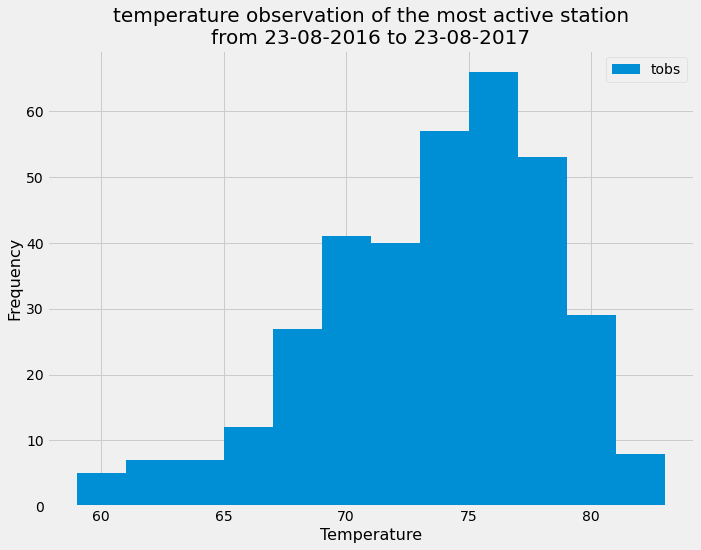

In [115]:
#plotting the above DataFrame results as a histogram
#displaying the last 12 months temperature observation of the most active station

plt.rcParams["figure.figsize"]=(10,7)
temp_obsv_df.plot.hist(bins=12)
plt.tight_layout()
plt.ylabel("Frequency",fontsize=16,color="black")
plt.xlabel("Temperature",fontsize=16,color="black")
plt.title("temperature observation of the most active station\nfrom 23-08-2016 to 23-08-2017",fontsize=20)
plt.show()


# Close session

In [116]:
# Close Session
session.close()

#  Bonus: Temperature Analysis I

In [223]:
import pandas as pd
from datetime import datetime as dt

In [224]:
# "tobs" is "temperature observations"
df = pd.read_csv("resources/hawaii_measurements.csv")
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [226]:
# Convert the date column format from string to datetime
df["date"]= pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [188]:
 # Set the date column as the DataFrame index
df.set_index("date",inplace=True)
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [192]:
#Drop the date column
drop_date_df=df.reset_index().drop(columns=["date"])
drop_date_df

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73
...,...,...,...
19545,USC00516128,0.09,71
19546,USC00516128,NaN,78
19547,USC00516128,0.56,76
19548,USC00516128,0.50,76


###  Compare June and December data across all years

In [197]:
from scipy import stats

In [200]:
 # Identify the average temperature for June
june_temp = session.query(Measurement.tobs).\
                    filter(Measurement.date.like("%-06-%")).all()
avg_june_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(Measurement.date.like("%-06-%")).scalar()
print(f"Average temperature in June for all stations and all years is: {round(avg_june_temp,2)} F")

Average temperature in June for all stations and all years is: 74.94 F


In [196]:
 # Identify the average temperature for December
december_temp = session.query(Measurement.tobs).\
                       filter(Measurement.date.like("%-12-%")).all()
avg_dec_temp = session.query(func.avg(Measurement.tobs)).\
                       filter(Measurement.date.like("%-12-%")).scalar()
print(f"Avg temperature in December for all stations and all years is: {round(avg_dec_temp,2)} F")   

Avg temperature in December for all stations and all years is: 71.04 F


In [219]:
# Create collections of temperature data
june_temp_list = [item for t in june_temp for item in t] 
dec_temp_list = [item for t in december_temp for item in t]           

#### Paired T-test
* In this analysis case, the paired t-test is used to determine any differences in the average June and December temperature in Hawaii between 2010 and 2017. the two observed temperature sample groups are taken in the same geographical location and represent the difference between the summer (June) and winter (December) temperatures.The null hypothesis, in this case, is that there is no statistically significant difference between the average June and December temperatures in Hawaii.

In [220]:
stats.ttest_rel(june_temp_list[0:200],dec_temp_list[0:200])

Ttest_relResult(statistic=21.812993236189637, pvalue=1.1467721770953326e-54)

###  Analysis

* The test t-statistic is 21.813 and can be used to calculate the p-value, which in this case, is equal 1.147e-54. This P-value is from far smaller than the standard threshold of 0.05. Therefore, the null hypothesis(Ho) is rejected and it can be highlighted that there is a statistically significant difference between the June temperature and the December temperature in Hawaii  

#  Bonus Challenge Assignment: Temperature Analysis II

In [117]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [122]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
Start_date="2017-06-05"
End_date="2017-07-15"
def calc_temps(Start_date, End_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= Start_date).filter(Measurement.date <= End_date).all()

my_date = calc_temps(Start_date, End_date)
print(my_date)

[(69.0, 77.50965250965251, 87.0)]


In [123]:
#creating the DataFrame of my above result obtain with the function
my_date_df = pd.DataFrame({"start_date":Start_date, "end_date":End_date,
                          "min.temp":[my_date[0][0]],
                          "max.temp":[my_date[0][1]],
                          "avg.temp":[my_date[0][2]]})

my_date_df.set_index(["start_date", "end_date"], inplace=True)
my_date_df

,,min.temp,max.temp,avg.temp
start_date,end_date,,,
2017-06-05,2017-07-15,69.0,77.509653,87.0


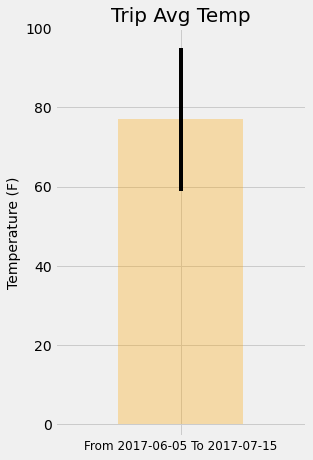

In [146]:
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)

avg_temp = [int(temp[1])for temp in my_date[::]]
#avg_temp

# Using the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
T_max_min = session.query(func.max(Measurement.tobs)-func.min(Measurement.tobs)).\
                    filter(Measurement.date>=Start_date).\
                    filter(Measurement.date<=End_date).all()

#ravel() in Python. The numpy module of Python provides a function called numpy. 
#ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
T_error=list(np.ravel(T_max_min))
#T_error



## Plot the results from your previous query as a bar chart.
plt.rcParams['figure.figsize']=(4,7)
x_axis=np.arange(len(avg_temp))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,avg_temp, color="orange", alpha=0.3, width=0.1,align="center",yerr=T_error[0])
plt.xticks(tick_locations, [(f"From {Start_date} To {End_date}")],fontsize=12,color='black')
plt.title("Trip Avg Temp",fontsize=20)
plt.ylabel('Temperature (F)',fontsize=14,color='black')
plt.yticks(fontsize=14)
plt.xlim(-0.1,0.1)
plt.ylim(-3,100)

plt.show()

###  Daily Rainfall Average

In [150]:
 # Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Total_prec_per_station = session.query(Measurement.station, Station.name,func.sum(Measurement.prcp),
                                      Station.latitude,Station.longitude,Station.elevation).\
                                      filter(Measurement.date>=Start_date).\
                                      filter(Measurement.date<=End_date).\
                                      filter(Measurement.station==Station.station).\
                                      group_by(Measurement.station).\
                                      order_by(func.sum(Measurement.prcp).desc()).all()
Total_prec_per_station

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  11.339999999999996,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  5.6,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  3.3299999999999983,
  21.4234,
  -157.8015,
  14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  2.63,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.8700000000000002,
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.56, 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', 0.12, 21.3934, -157.9751, 11.9)]

In [151]:
#displaying the above result dataframe
#Showing the estimate daily rainfall by station considering my choicing date "2017-06-05" - "2017-07-15"
Total_prec_per_station_df = pd.DataFrame(Total_prec_per_station,
                                        columns=["station","name","total prcp","latitude", "longitude", "elevation"])

Total_prec_per_station_df

,station,name,total prcp,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",11.34,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",5.60,21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",3.33,21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2.63,21.52130,-157.83740,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.87,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.56,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",0.12,21.39340,-157.97510,11.9


###  Daily Temperature Normals

In [152]:
 # Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [155]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
    
    

# Use the start and end date to create a range of dates
my_trip_dates=["08-01","08-02","08-03","08-04","08-05","08-06","08-07"]
normals=[]
def daily_normals(date):
    select=[func.min(Measurement.tobs), 
           func.round(func.avg(Measurement.tobs),2), 
           func.max(Measurement.tobs)]
    return session.query(*select).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
for x in my_trip_dates:
    normals.append(daily_normals(x)[0])
    print(normals)

[(67.0, 75.54, 83.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0), (70.0, 76.61, 85.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0), (70.0, 76.61, 85.0), (69.0, 76.71, 84.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0), (70.0, 76.61, 85.0), (69.0, 76.71, 84.0), (69.0, 76.15, 82.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0), (70.0, 76.61, 85.0), (69.0, 76.71, 84.0), (69.0, 76.15, 82.0), (67.0, 76.25, 83.0)]
[(67.0, 75.54, 83.0), (68.0, 75.6, 84.0), (70.0, 76.61, 85.0), (69.0, 76.71, 84.0), (69.0, 76.15, 82.0), (67.0, 76.25, 83.0), (71.0, 77.16, 83.0)]


In [156]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
my_trip_d_normals_df = pd.DataFrame(normals,columns=["min.temp","avg.temp","max.temp"],index=my_trip_dates)

my_trip_d_normals_df.index.name = "date"
my_trip_d_normals_df

,min.temp,avg.temp,max.temp
date,,,
08-01,67.0,75.54,83.0
08-02,68.0,75.60,84.0
08-03,70.0,76.61,85.0
08-04,69.0,76.71,84.0
08-05,69.0,76.15,82.0
08-06,67.0,76.25,83.0
08-07,71.0,77.16,83.0


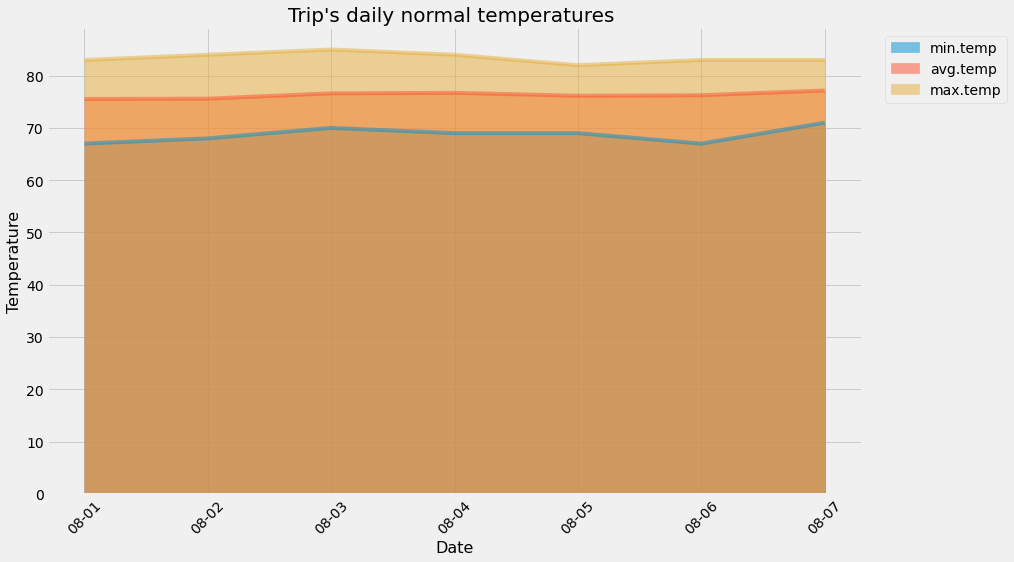

In [194]:
 # Plot the daily normals as an area plot with `stacked=False`
plt.rcParams["figure.figsize"]=(13,8)
my_trip_d_normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.xlabel("Date",fontsize=16,color="black")
plt.ylabel("Temperature",fontsize=16,color="black")
plt.title("Trip's daily normal temperatures ",fontsize=20)
plt.gca().legend(loc='center left', bbox_to_anchor=(1.02, 0.91))
plt.show() 

##  Close Session

In [227]:
# Close Session
session.close()